In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import geopandas as gpd
import geocoder
import pysal
import descartes


%matplotlib inline

ModuleNotFoundError: No module named 'pandas_profiling'

In [3]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
data = pd.read_csv('C:/Users/User-PC/Documents/Census/acs2015-county-data.csv')
data.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.600,75.800,18.500,0.400,...,0.500,1.300,1.800,26.500,23986,73.600,20.900,5.500,0.000,7.600
1,1003,Alabama,Baldwin,195121,95314,99807,4.500,83.100,9.500,0.600,...,1.000,1.400,3.900,26.400,85953,81.500,12.300,5.800,0.400,7.500
2,1005,Alabama,Barbour,26932,14497,12435,4.600,46.200,46.700,0.200,...,1.800,1.500,1.600,24.100,8597,71.800,20.800,7.300,0.100,17.600
3,1007,Alabama,Bibb,22604,12073,10531,2.200,74.500,21.400,0.400,...,0.600,1.500,0.700,28.800,8294,76.800,16.100,6.700,0.400,8.300
4,1009,Alabama,Blount,57710,28512,29198,8.600,87.900,1.500,0.300,...,0.900,0.400,2.300,34.900,22189,82.000,13.500,4.200,0.400,7.700


In [5]:
data.shape

(3220, 37)

In [42]:
ProfileReport(data)

NameError: name 'ProfileReport' is not defined

##### Dataset has 3220 raws and 37 columns.

In [7]:
data.size #numer of items

119140

##### Dataset has 119140 items.

In [8]:
Walk = data.Walk

In [9]:

print(Walk)

0       0.500
1       1.000
2       1.800
3       0.600
4       0.900
5       5.000
6       0.800
7       1.200
8       0.300
9       0.600
10      1.100
11      1.900
12      1.300
13      1.800
14      0.200
15      1.000
16      0.900
17      0.600
18      0.900
19      1.500
20      1.300
21      1.500
22      1.600
23      2.200
24      0.600
25      0.400
26      1.200
27      0.400
28      0.300
29      0.200
        ...  
3190    4.700
3191    4.100
3192    4.300
3193    4.700
3194    4.700
3195    1.700
3196    5.600
3197    3.200
3198    3.800
3199    2.800
3200    6.500
3201    4.800
3202    2.100
3203    3.100
3204    6.000
3205    3.000
3206    6.100
3207    3.600
3208    3.400
3209    3.400
3210    1.400
3211    2.500
3212    1.400
3213    7.800
3214    3.100
3215    1.200
3216   10.800
3217    3.200
3218    2.300
3219    1.600
Name: Walk, Length: 3220, dtype: float64


##### The output for Walk shows us that the Walk variable is encoded as numeric data types (floats) 

In [10]:
Walk.describe()

count   3220.000
mean       3.324
std        3.756
min        0.000
25%        1.400
50%        2.400
75%        4.000
max       71.200
Name: Walk, dtype: float64

##### We can see that the count of age(3220) is equal to total row count of the data set(3220). This indicates no missing data. If we had missing data, filling in missing values with a central number like the mean would be entirely reasonable.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000002700D5FF98>]],
      dtype=object)

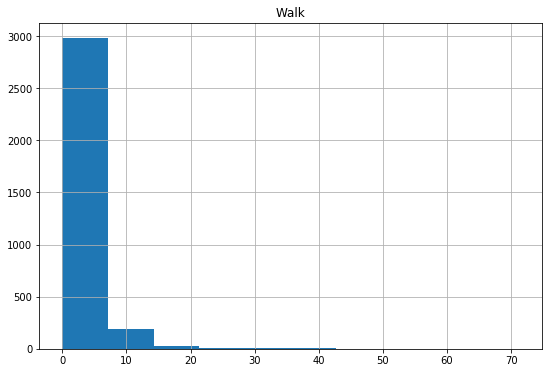

In [11]:

data.hist(column='Walk',    # Column to plot
                figsize=(9,6),   # Plot size
                bins=10)         # Number of histogram bins

##### From the histogram, we see that walks between 0 and 10 are the most common,

In [12]:
Public_Work = data.PublicWork

In [13]:
print(Public_Work)

0      20.900
1      12.300
2      20.800
3      16.100
4      13.500
5      15.100
6      16.200
7      20.800
8      12.100
9      18.500
10     15.200
11     16.800
12     13.600
13     14.700
14     15.300
15     23.500
16     16.100
17     13.000
18     17.500
19     15.800
20     17.800
21     12.200
22     20.900
23     16.700
24     12.600
25     24.100
26     19.000
27     14.400
28     14.200
29     14.600
        ...  
3190   48.500
3191   25.300
3192   29.100
3193   22.900
3194   23.000
3195   22.900
3196   32.600
3197   39.300
3198   31.000
3199   20.400
3200   24.100
3201   19.500
3202   23.400
3203   29.800
3204   32.400
3205   22.700
3206   18.900
3207   22.200
3208   23.700
3209   25.300
3210   21.600
3211   23.300
3212   21.000
3213   34.000
3214   20.300
3215   17.600
3216   41.600
3217   27.500
3218   27.600
3219   27.600
Name: PublicWork, Length: 3220, dtype: float64


##### The output for Publicwork shows us that the Publicwork variable is encoded as numeric data types (floats) 

In [14]:

Public_Work.describe()

count   3220.000
mean      17.561
std        6.510
min        5.800
25%       13.100
50%       16.200
75%       20.500
max       66.200
Name: PublicWork, dtype: float64

#####   We can see that the count of Public_Work(3220) is equal to total row count of the data set(3220). This indicates no missing data. If we had missing data, filling in missing values with a central number like the mean would be entirely reasonable

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000002700D70C50>]],
      dtype=object)

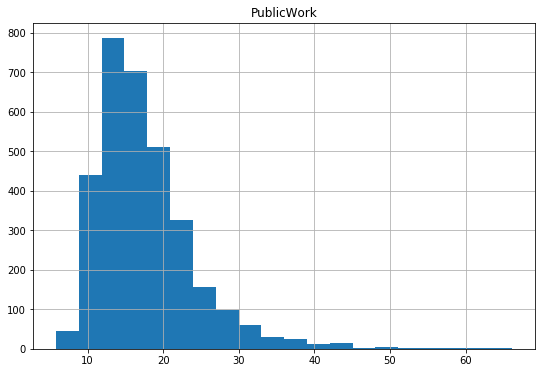

In [15]:
data.hist(column='PublicWork',    # Column to plot
                figsize=(9,6),   # Plot size
                bins=20)         # Number of histogram bins

##### From the histogram, we see that PublicWorks between 10 and 20 are the most common

In [16]:
data["State"].describe()

count      3220
unique       52
top       Texas
freq        254
Name: State, dtype: object

In [17]:

missing = np.where(data["State"].isnull() == True)
missing

(array([], dtype=int64),)

len(missing[0])

##### This indicates no missing data. 

In [18]:
pd.Categorical(data["State"]).describe()

,counts,freqs
categories,,
Alabama,67,0.021
Alaska,29,0.009
Arizona,15,0.005
Arkansas,75,0.023
California,58,0.018
Colorado,64,0.020
Connecticut,8,0.002
Delaware,3,0.001
District of Columbia,1,0.000


In [19]:
data_state = data.groupby(['State']).size()

In [20]:

print(data_state)

State
Alabama                  67
Alaska                   29
Arizona                  15
Arkansas                 75
California               58
Colorado                 64
Connecticut               8
Delaware                  3
District of Columbia      1
Florida                  67
Georgia                 159
Hawaii                    5
Idaho                    44
Illinois                102
Indiana                  92
Iowa                     99
Kansas                  105
Kentucky                120
Louisiana                64
Maine                    16
Maryland                 24
Massachusetts            14
Michigan                 83
Minnesota                87
Mississippi              82
Missouri                115
Montana                  56
Nebraska                 93
Nevada                   17
New Hampshire            10
New Jersey               21
New Mexico               33
New York                 62
North Carolina          100
North Dakota             53
Ohio          

C:\Users\User-PC\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


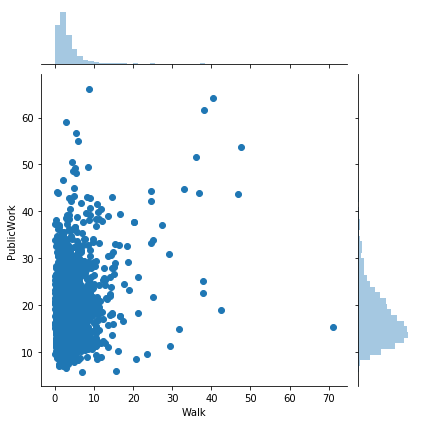

In [21]:
import seaborn
seaborn.jointplot(x = 'Walk', y = 'PublicWork', data = data)

C:\Users\User-PC\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


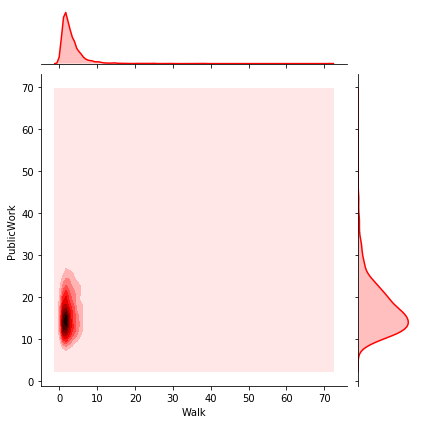

In [24]:
#All Genders
seaborn.jointplot(x = 'Walk', y = 'PublicWork', data = data, kind = 'kde', color = 'r')

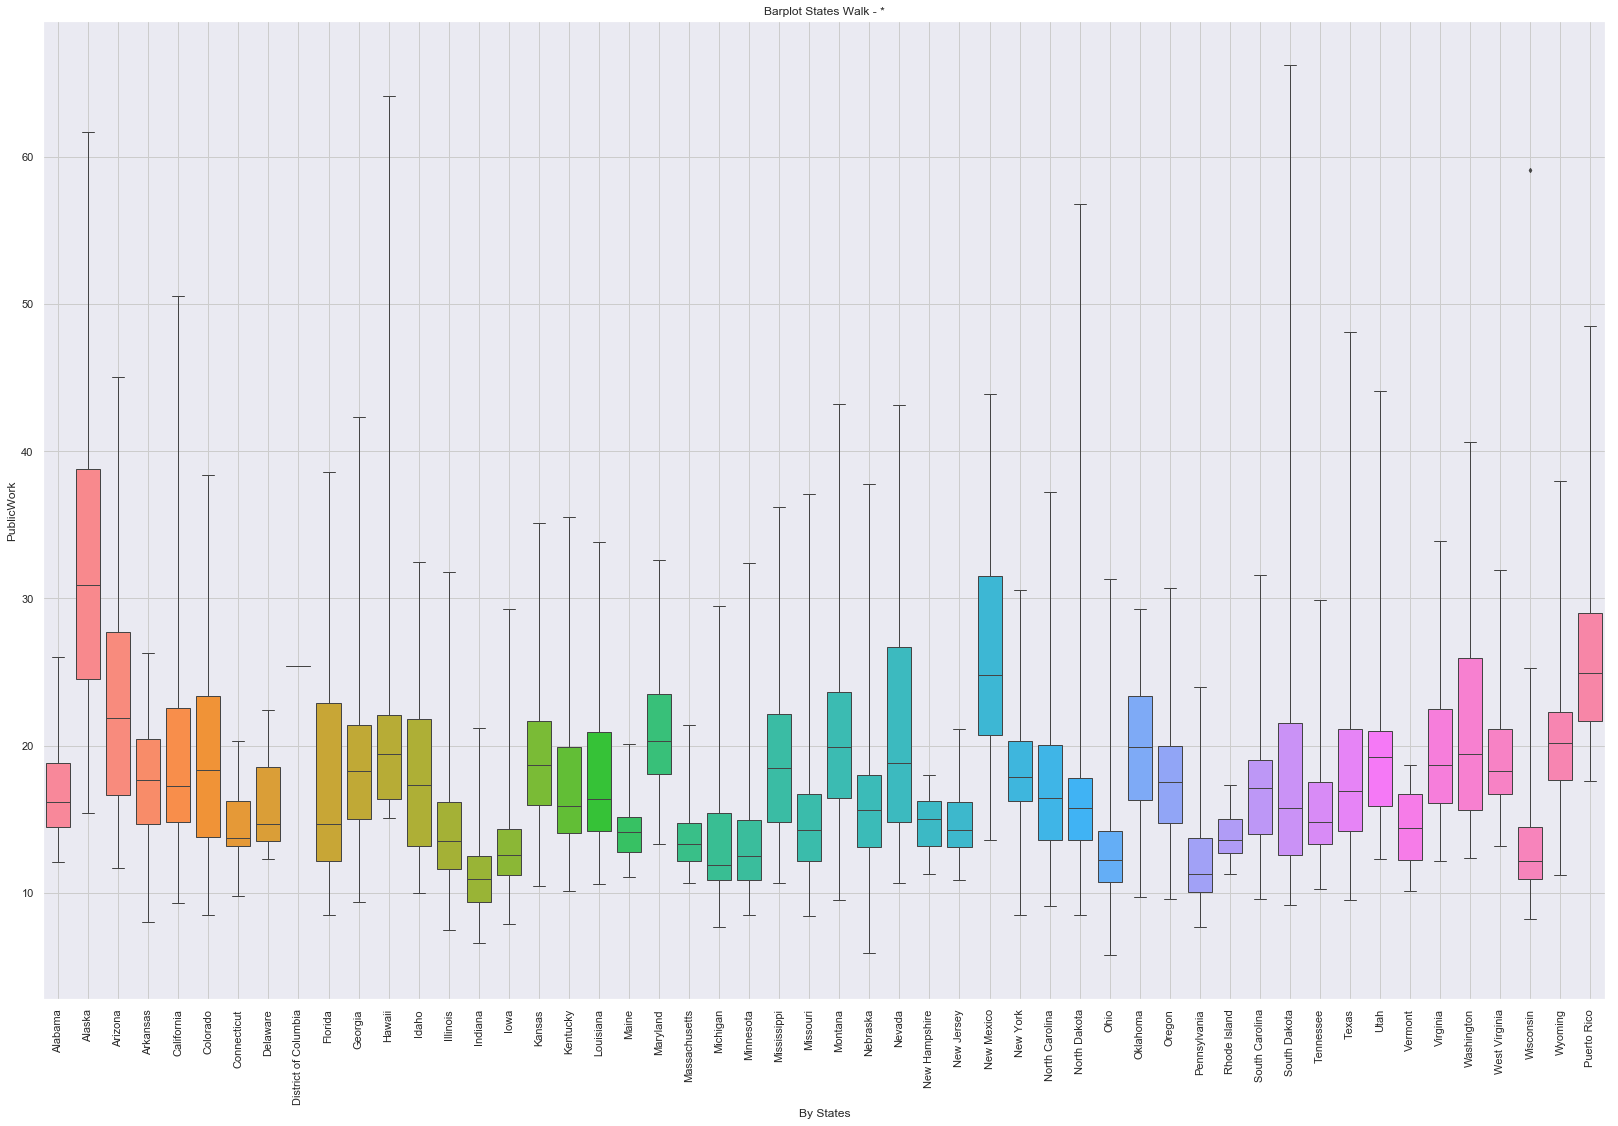

In [41]:
sns.boxplot(x = 'State', y = 'PublicWork', data = data, fliersize = 3, linewidth=1, whis = 10, saturation=8)
sns.set(rc={'figure.figsize':(28,18)})
plt.xlabel('By States')
plt.ylabel('PublicWork')
plt.xticks(rotation='vertical')
plt.title('Barplot States Walk - *')
plt.grid(True, color = '#CCCCCC')
plt.show()


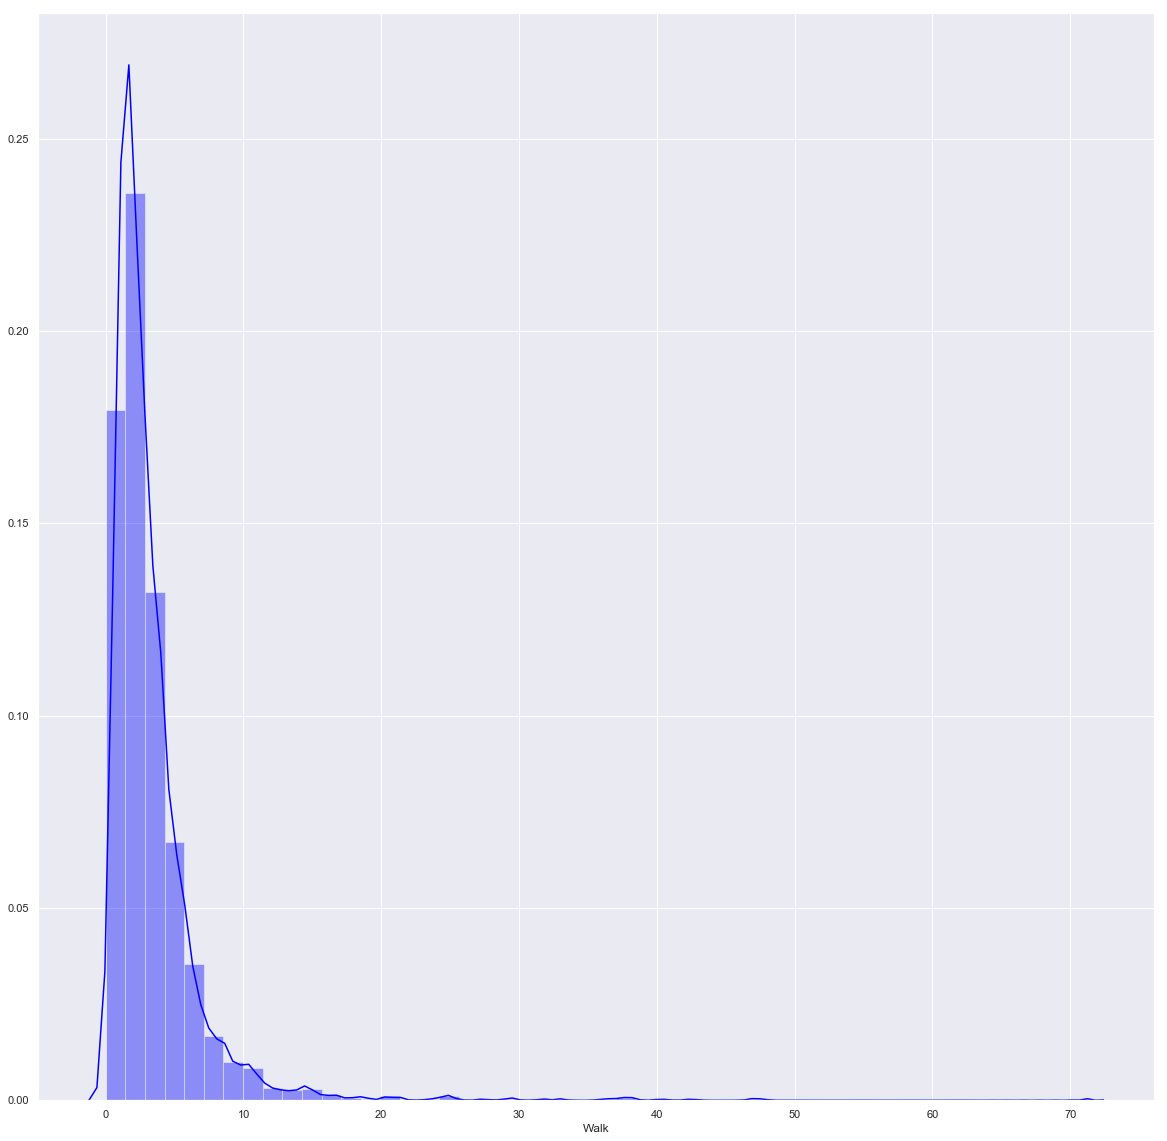

In [27]:

seaborn.distplot(data['Walk'], color='blue')

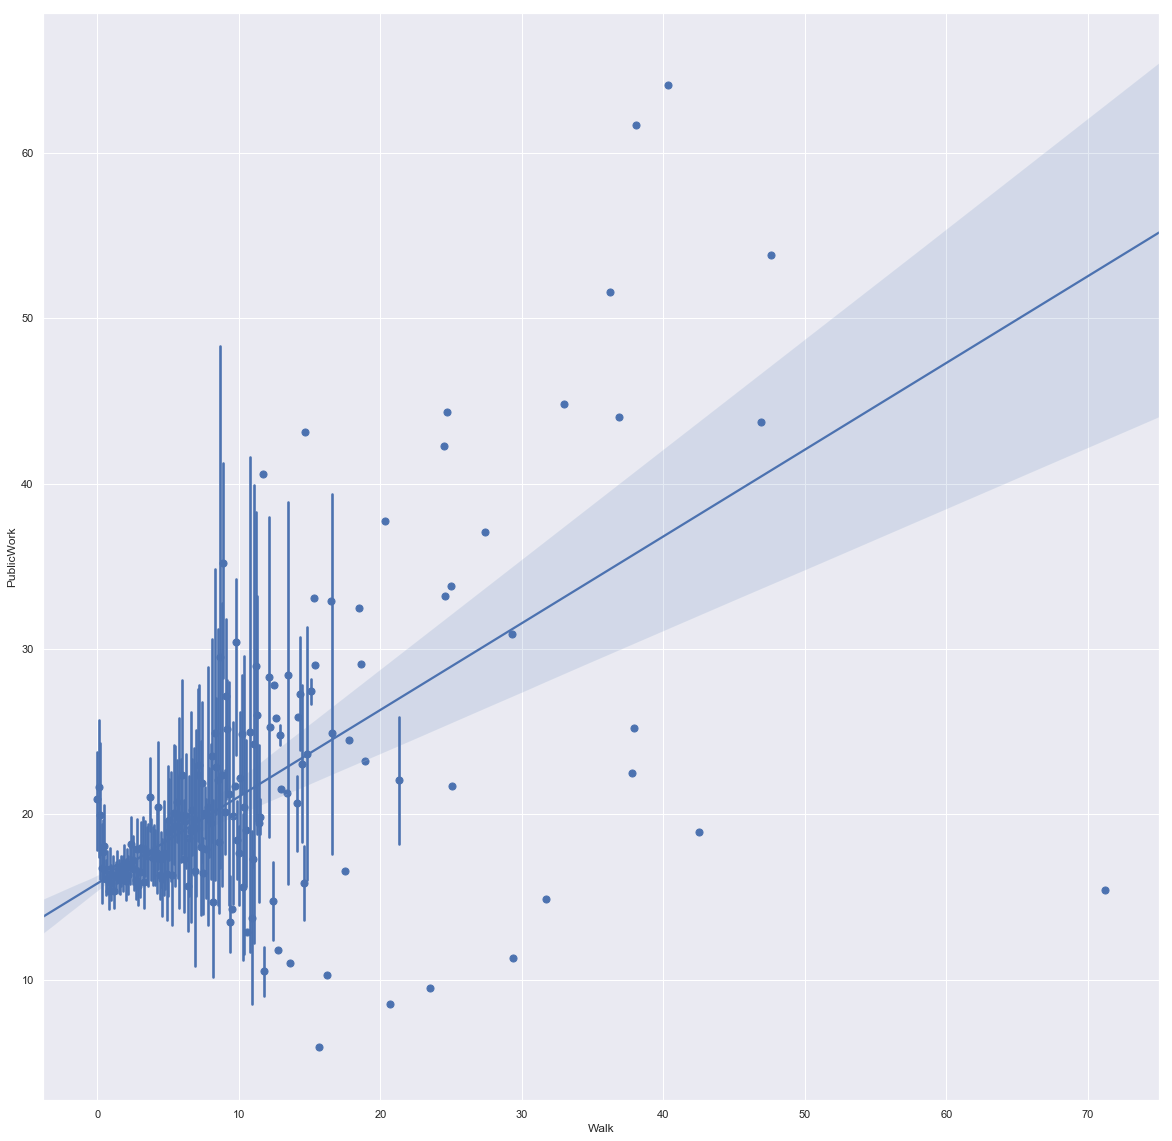

In [28]:
seaborn.regplot(x = 'Walk', y = 'PublicWork', data = data, x_estimator = np.mean)

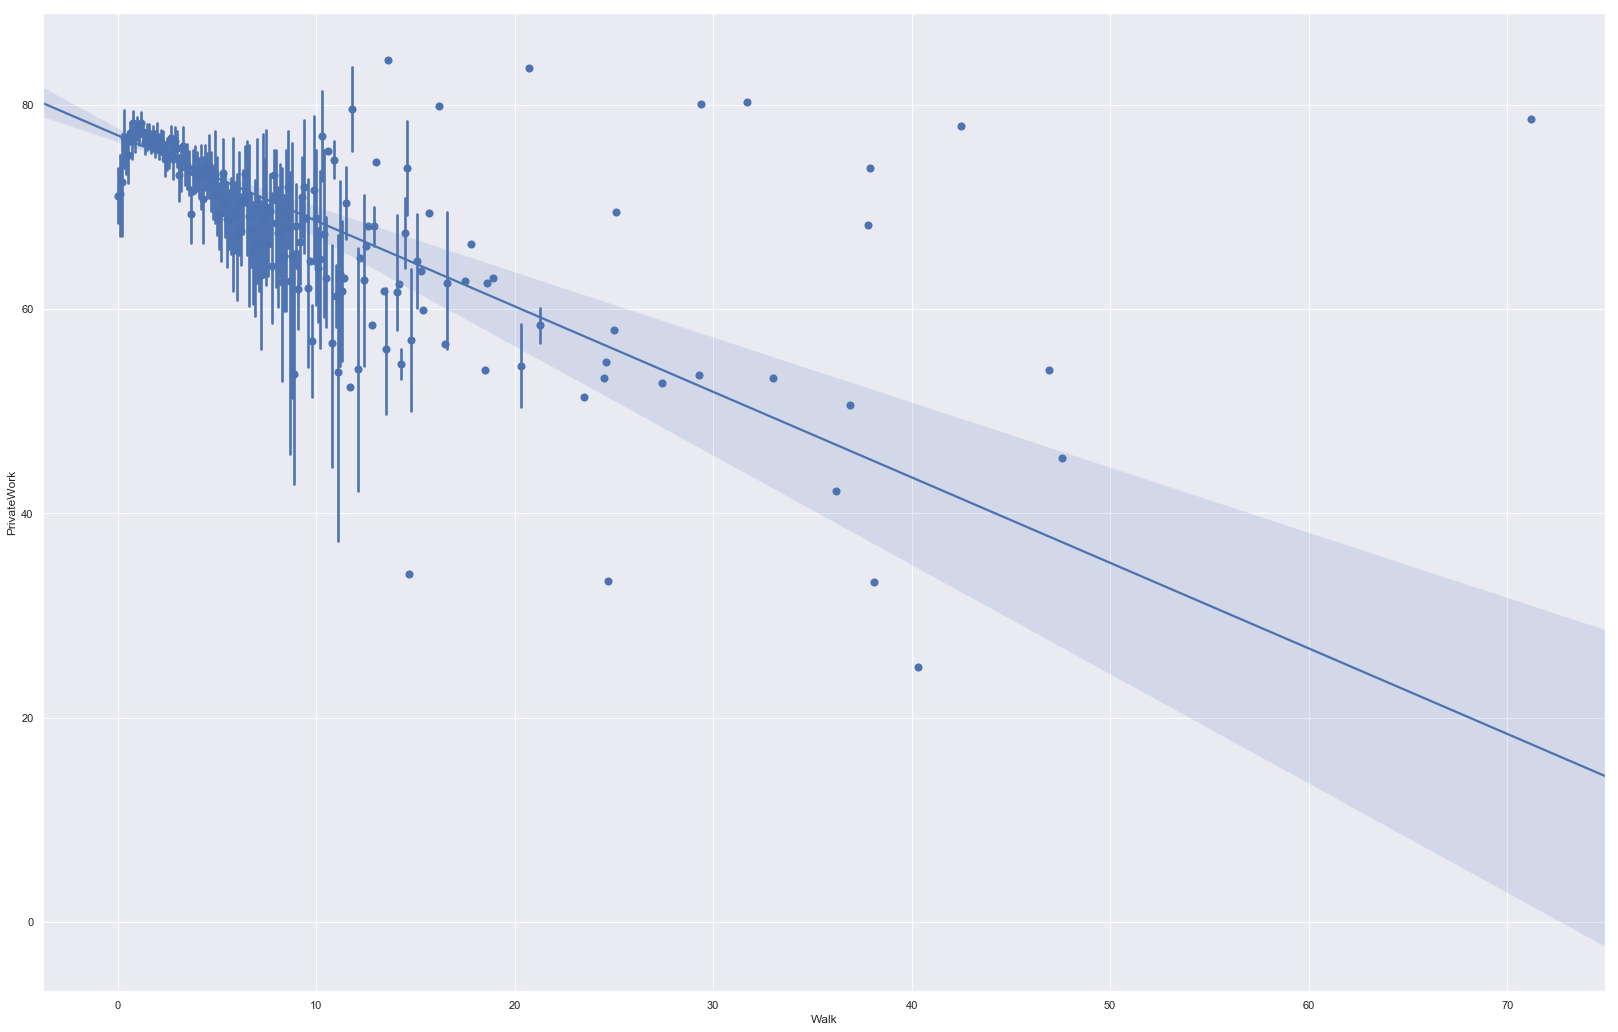

In [31]:
seaborn.regplot(x = 'Walk', y = 'PrivateWork', data = data, x_estimator = np.mean)

In [32]:
Georgia_data = data[data['State'] == 'Georgia ']
Alabama_data = data[data['State'] == 'Alabama ']
Arkansas_data = data[data['State'] == 'Arkansas']
California_data = data[data['State']=='California']
Colorado_data = data[data['State']=='Colorado']
Connecticut_data = data[data['State']=='Connecticut']
Florida_data = data[data['State']=='Florida']
Delaware_data = data[data['State']=='Delaware']
DistrictofColumbia_data = data[data['State']=='District of Columbia']
Hawaii_data = data[data['State']=='Hawaii']
Idaho_data = data[data['State']=='Idaho']
Kansas_data = data[data['State']=='Kansas']
Kentucky_data = data[data['State']=='Kentucky']
Louisiana_data = data[data['State']=='Louisiana']






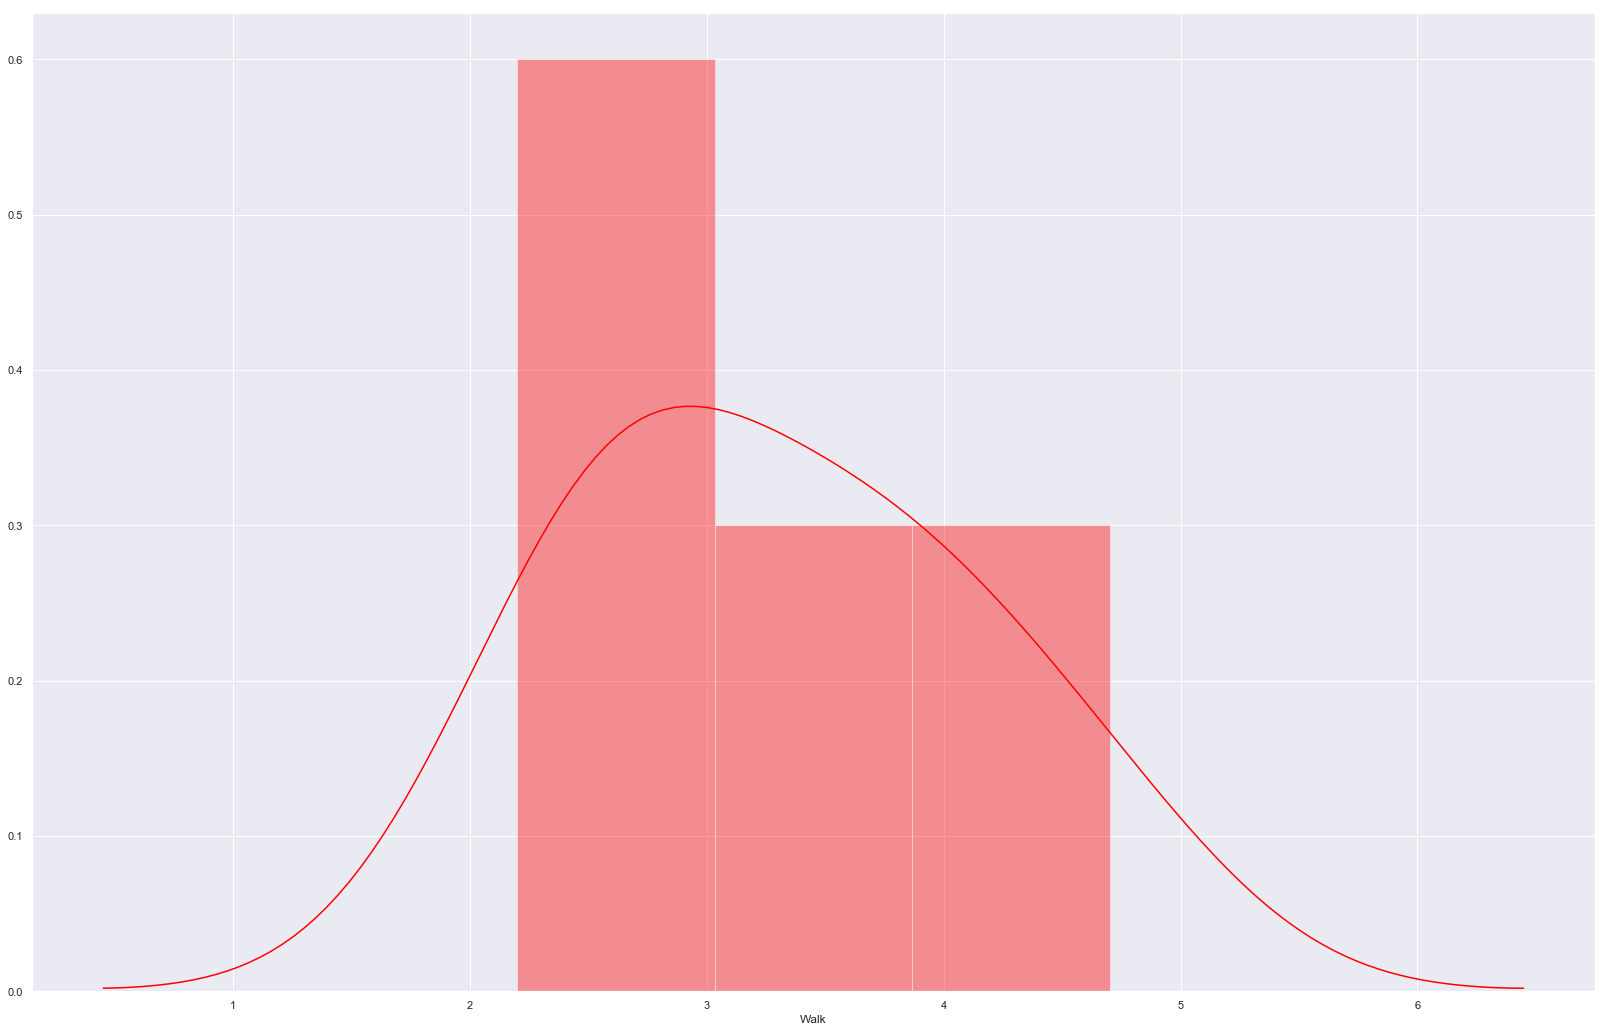

In [33]:
seaborn.distplot(Connecticut_data['Walk'], color='red')

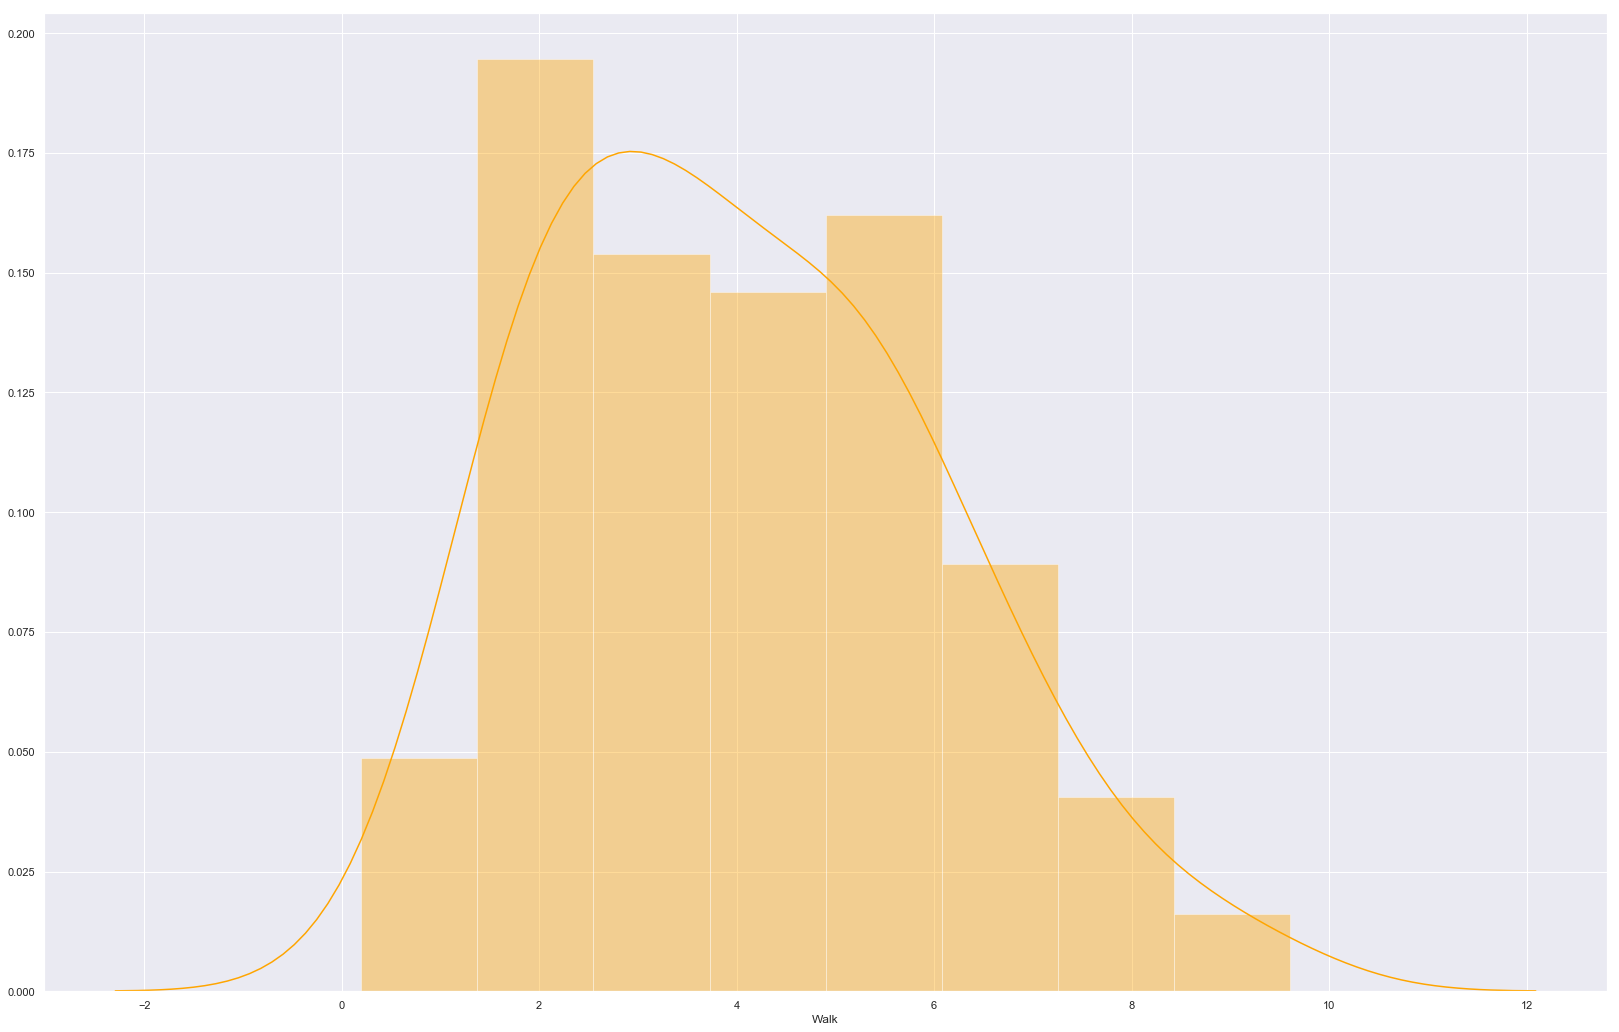

In [34]:
seaborn.distplot(Kansas_data['Walk'], color='orange')

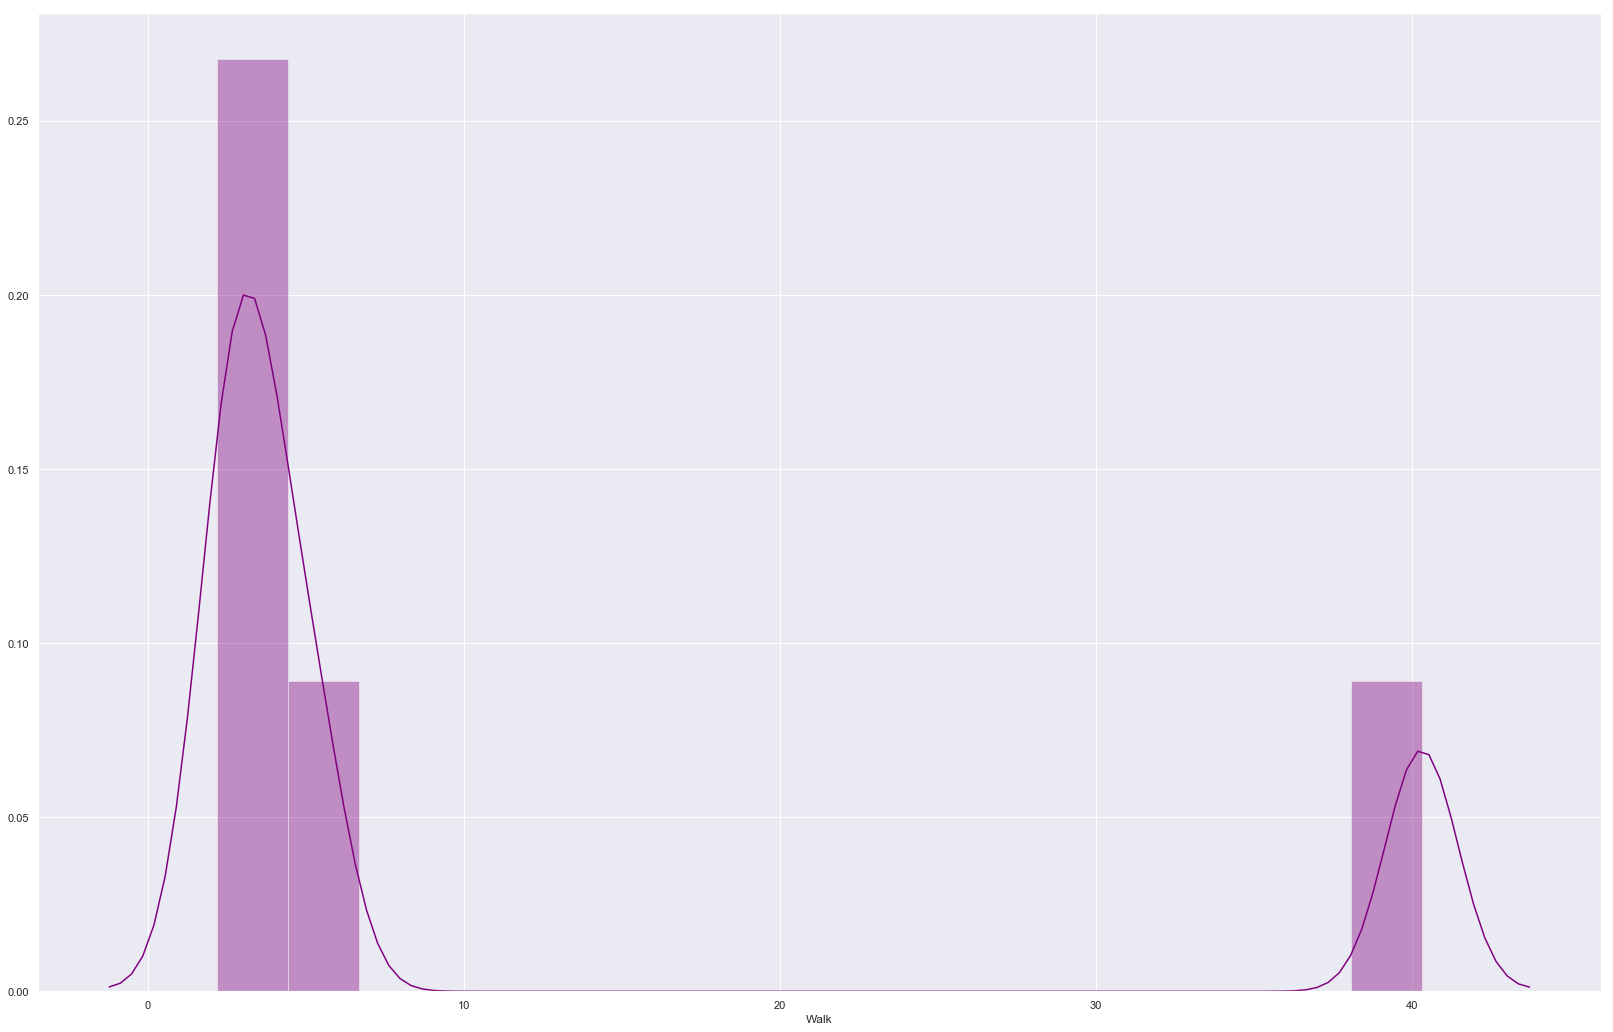

In [35]:
seaborn.distplot(Hawaii_data['Walk'], color='purple')